# 선형회귀 개요

선형 회귀(線型回歸, Linear regression)는 종속 변수 y와 한 개 이상의 독립 변수X와의 선형 상관 관계를 모델링하는 회귀분석 기법. [위키백과](https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80)

## 선형회귀 모델
- 각 Feature들에 가중치(Weight)를 곱하고 편향(bias)를 더해 예측 결과를 출력한다.
- Weight와 bias가 학습 대상 Parameter가 된다.

$$
\hat{y_i} = w_1 x_{i1} + w_2 x_{i2}... + w_{p} x_{ip} + b
\\
\hat{y_i} = \mathbf{w}^{T} \cdot \mathbf{X} 
$$

- $\hat{y_i}$: 예측값
- $x$: 특성(feature-컬럼)
- $w$: 가중치(weight), 회귀계수(regression coefficient). 특성이 $\hat{y_i}$ 에 얼마나 영향을 주는지 정도
- $b$: 절편
- $p$: p 번째 특성(feature)/p번째 가중치
- $i$: i번째 관측치(sample)

### Boston DataSet
보스톤의 지역별 집값 데이터셋

 - CRIM	: 지역별 범죄 발생률
 - ZN	: 25,000 평방피트를 초과하는 거주지역의 비율
 - INDUS: 비상업지역 토지의 비율
 - CHAS	: 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
 - NOX	: 일산화질소 농도
 - RM	: 주택 1가구당 평균 방의 개수
 - AGE	: 1940년 이전에 건축된 소유주택의 비율
 - DIS	: 5개의 보스턴 고용센터까지의 접근성 지수
 - RAD	: 고속도로까지의 접근성 지수
 - TAX	: 10,000 달러 당 재산세율
 - PTRATIO : 지역별 교사 한명당 학생 비율
 - B	: 지역의 흑인 거주 비율
 - LSTAT: 하위계층의 비율(%)
 
 - MEDV	: Target.  지역의 주택가격 중앙값 (단위: $1,000)


#### Boston housing dataset loading

In [1]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

In [2]:
# dataframe으로 만들기
cols = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
df = pd.DataFrame(X, columns=cols)
df['MEDV'] = y
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [4]:
df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

## LinearRegression
- 가장 기본적인 선형 회귀 모델
- 각 Feauture에 가중합으로 Y값을 추론한다.
### 데이터 전처리

- **선형회귀 모델사용시 전처리**
    - **범주형 Feature**
        - : 원핫 인코딩
    - **연속형 Feature**
        - Feature Scaling을 통해서 각 컬럼들의 값의 단위를 맞춰준다.
        - StandardScaler를 사용할 때 성능이 더 잘나오는 경향이 있다.

##### train/test set 나누기

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

##### Feature scaling

In [6]:
# CHAS -범주형- 은 빼고 Feature Scaling 처리
chas_train, chas_test = X_train[:, 3].reshape(-1, 1), X_test[:, 3].reshape(-1, 1)
chas_train.shape
print(np.unique(chas_train), np.unique(chas_test))

[0. 1.] [0. 1.]


In [7]:
# X에서 CHAS 피쳐값 제거
X_train = np.delete(X_train, 3, axis=1) # (대상 배열, 삭제할 index, axis = 축)
X_test = np.delete(X_test, 3, axis=1)
X_train.shape, X_test.shape

((404, 12), (102, 12))

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled_tmp = scaler.fit_transform(X_train)
X_test_scaled_tmp = scaler.transform(X_test)


## CHAS 추가
X_train_scaled = np.append(X_train_scaled_tmp, chas_train, axis=1) # (추가 대상 배열, 추가할 대상 배열, axis=축)
X_test_scaled = np.append(X_test_scaled_tmp, chas_test, axis=1)

X_train_scaled.shape, X_test_scaled.shape

((404, 13), (102, 13))

In [9]:
X_train_scaled.mean(axis=0), X_train_scaled.std(axis=0)

(array([-2.33174316e-16, -6.23813432e-17,  2.69916103e-15, -9.89857261e-16,
        -1.47571724e-15,  8.65918998e-16,  2.00884414e-16, -1.18716917e-16,
         2.91296140e-17,  1.65098958e-14,  7.99759049e-15, -1.85852434e-15,
         6.93069307e-02]),
 array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.25397535]))

##### 모델 생성, 학습

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [11]:
# weight coef - 가중치
lr.coef_, lr.coef_.shape

(array([-0.97082019,  1.05714873,  0.03831099, -1.8551476 ,  2.57321942,
        -0.08761547, -2.88094259,  2.11224542, -1.87533131, -2.29276735,
         0.71817947, -3.59245482,  2.34080361]),
 (13,))

In [12]:
# bias - 절편 -> 모든 feature들이 0일 때 y의 값
lr.intercept_

22.44964727481494

In [13]:
X_train_scaled[0] @ lr.coef_ + lr.intercept_

32.556926552389825

In [14]:
lr.predict(X_train_scaled[:2])

array([32.55692655, 21.92709478])

> ### Coeficient의 부호
> - weight가 
> - 양수: Feature가 1 증가할때 y(집값)도 weight만큼 증가한다.
> - 음수: Feature가 1 증가할때 y(집값)도 weight만큼 감소한다.
> - 절대값 기준으로 0에 가까울 수록 집값에 영향을 주지 않고 크면 클수록(0에서 멀어질 수록) 집값에 영향을 많이 주는 Feature 란 의미가 된다.

##### 평가

In [15]:
from metrics import print_metrics_regression as pmr

train_pred = lr.predict(X_train_scaled)
test_pred = lr.predict(X_test_scaled)
pmr(y_train, train_pred, title='Train set')
print("=" *50)
pmr(y_test, test_pred, title='Test set')

Train set
MSE: 19.326, RMSE: 4.396, MAE: 3.103, R2: 0.773
Test set
MSE: 33.449, RMSE: 5.784, MAE: 3.843, R2: 0.589


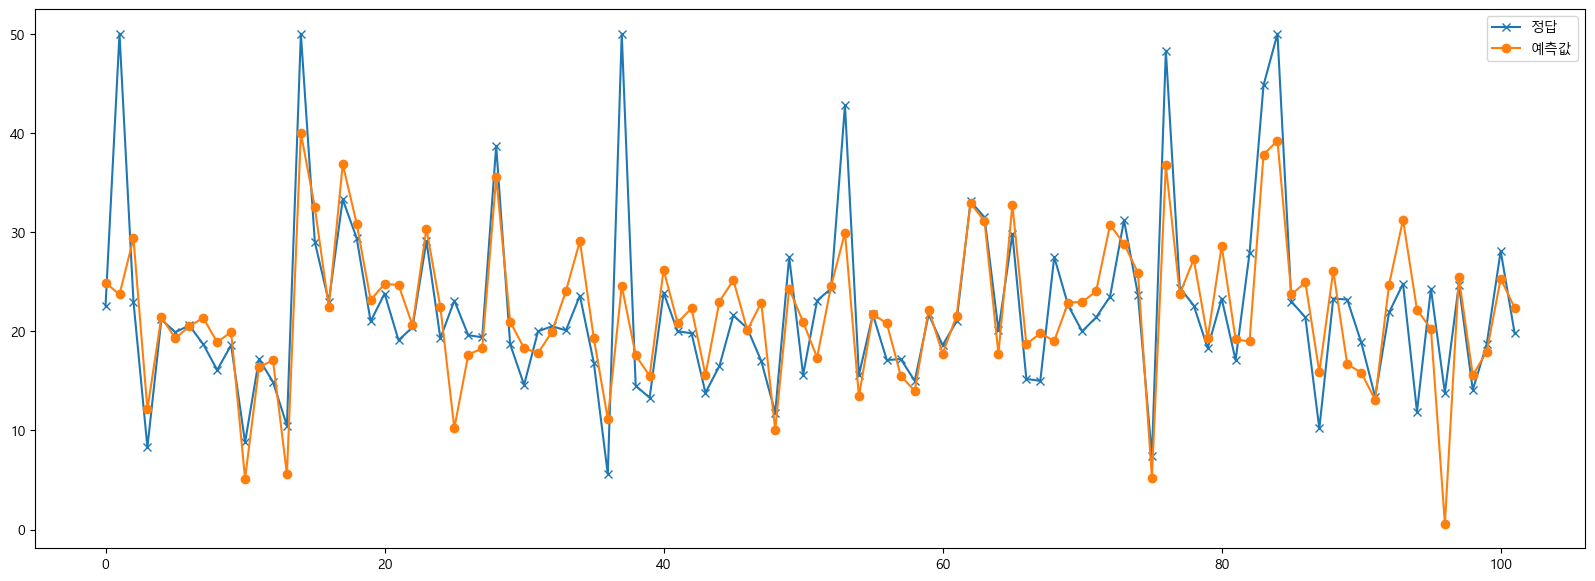

In [16]:
# 정답, 모델 예측값을 비교하는 그래프
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 7))
x = range(len(y_test))
plt.plot(x, y_test, marker='x', label='정답')
plt.plot(x, test_pred, marker='o', label='예측값')
plt.legend()
plt.show()

# 다항회귀 (Polynomial Regression)
- 전처리방식 중 하나로 Feature가 너무 적어 y의 값들을 다 설명하지 못하여 underfitting이 된 경우 Feature를 늘려준다.
- 각 Feature들을 거듭제곱한 것과 Feature들 끼리 곱한 새로운 특성들을 추가한다.
    - 파라미터 가중치를 기준으로는 일차식이 되어 선형모델이다. 입력데이터(X)들을 기준으로는 N차식이 되어 비선형 데이터를 추론할 수 있는 모델이 된다.
- `PolynomialFeatures` Transformer를 사용해서 변환한다.

## 예제

##### 데이터셋 만들기

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)
# X**2 + X + 2  -> 다항 회귀를 진행해야 함
def func(X):
    return X**2 + X + 2 + np.random.normal(0,1, size=(X.size, 1))  # 퍼트려 주기 위한 random 덧셈 (noise)

m = 100 # 생성할 데이터개수
X = 6 * np.random.rand(m, 1) - 3   # rand() : 0 ~ 1 임의의 -실수
y = func(X)
y = y.flatten()

print(X.shape, y.shape)

(100, 1) (100,)


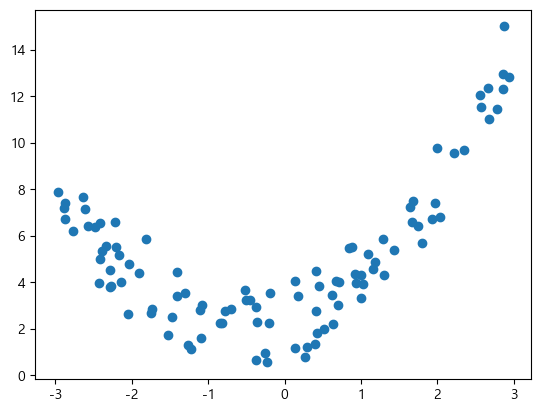

In [18]:
plt.scatter(X, y);

##### 모델생성, 학습

In [19]:
lr = LinearRegression()
lr.fit(X, y)
pred = lr.predict(X)
pmr(y, pred)

MSE: 7.729, RMSE: 2.780, MAE: 2.322, R2: 0.191


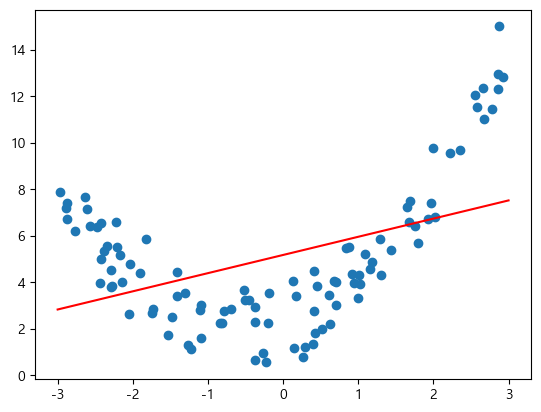

In [20]:
# 단항 회귀 결과
X_new = np.linspace(-3, 3, 100).reshape(-1, 1)
pred_new = lr.predict(X_new)
plt.scatter(X, y)
plt.plot(X_new, pred_new, color='red')

plt.show()

##### PolynomialFeatures를 이용해 다항회귀구현

In [21]:
from sklearn.preprocessing import PolynomialFeatures

# 기존 컬럼에 N 제곱한 값을 가지는 컬럼들, 기존 컬럼들끼리 곱한 값을 가지는 컬럼들을 추가
pn = PolynomialFeatures(degree=2,  # 몇 제곱까지 할지 설정. 3 -> X, X**2, X**3
                       include_bias=False) # 상수항 (모든 값이 1로 구성된 feature)를 생성 안한다 (default: True)
X_poly = pn.fit_transform(X)
print(X.shape, X_poly.shape)

(100, 1) (100, 2)


- 만약 include_bias=False를 안해줄 경우 결과 값
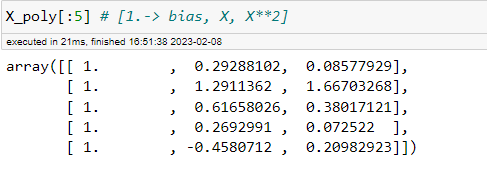

In [22]:
X_poly[:5]

array([[ 0.29288102,  0.08577929],
       [ 1.2911362 ,  1.66703268],
       [ 0.61658026,  0.38017121],
       [ 0.2692991 ,  0.072522  ],
       [-0.4580712 ,  0.20982923]])

In [23]:
# 변환한 feature들의 이름(어떻게 만들었는지)를 조회
pn.get_feature_names_out()

array(['x0', 'x0^2'], dtype=object)

##### LinearRegression 모델을 이용해 평가

In [24]:
lr2 = LinearRegression()
lr2.fit(X_poly, y)

LinearRegression()

In [25]:
# 평가
pred2 = lr2.predict(X_poly)
pmr(y, pred2, title='변환후')
print("="*50)
pmr(y, pred, title='변환전')

변환후
MSE: 0.974, RMSE: 0.987, MAE: 0.828, R2: 0.898
변환전
MSE: 7.729, RMSE: 2.780, MAE: 2.322, R2: 0.191


In [26]:
lr2.coef_

array([0.97906552, 0.94978823])

In [27]:
lr2.intercept_

2.3405007562628866

##### 시각화

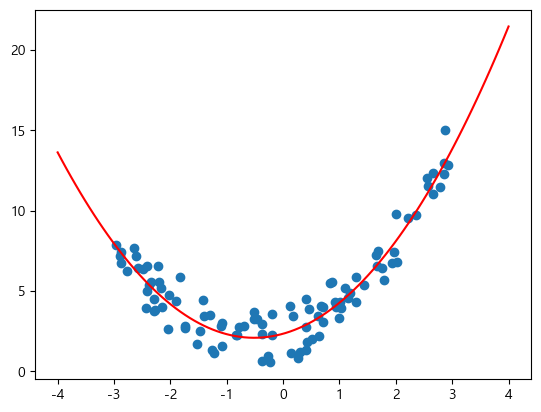

In [28]:
X_new = np.linspace(-4, 4, 100).reshape(-1, 1)
X_new_poly = pn.transform(X_new) # 변환처리
y_new = lr2.predict(X_new_poly)

plt.scatter(X, y)
plt.plot(X_new, y_new, color='red')
plt.show()

## degree를 크게
- Feature가 너무 많으면 Overfitting 문제가 생긴다.

In [29]:
pn2 = PolynomialFeatures(degree=35, include_bias=False)
X_poly2 = pn2.fit_transform(X)
print(X.shape, X_poly2.shape)
pn2.get_feature_names_out()

(100, 1) (100, 35)


array(['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8',
       'x0^9', 'x0^10', 'x0^11', 'x0^12', 'x0^13', 'x0^14', 'x0^15',
       'x0^16', 'x0^17', 'x0^18', 'x0^19', 'x0^20', 'x0^21', 'x0^22',
       'x0^23', 'x0^24', 'x0^25', 'x0^26', 'x0^27', 'x0^28', 'x0^29',
       'x0^30', 'x0^31', 'x0^32', 'x0^33', 'x0^34', 'x0^35'], dtype=object)

In [30]:
lr3 = LinearRegression()
lr3.fit(X_poly2, y)
print(lr3.coef_)
print(lr3.intercept_)

[ 6.04770822e-03  1.27771126e-02  8.09283344e-04  2.34024782e-02
  1.52745938e-02  3.64078145e-02  2.85723190e-02  4.97172661e-02
  4.11084078e-02  5.60231423e-02  4.60888732e-02  4.25961609e-02
  3.32181282e-02  2.17974373e-03 -6.68589087e-04 -3.97571667e-02
 -3.14836735e-02 -2.00118673e-02 -1.29566196e-02  4.55141251e-02
  3.28021277e-02 -2.62558108e-02 -1.89760876e-02  8.08195831e-03
  5.79572189e-03 -1.52481955e-03 -1.08109913e-03  1.82597547e-04
  1.27783614e-04 -1.35971418e-05 -9.38354452e-06  5.76210066e-07
  3.91925797e-07 -1.06418916e-08 -7.13178596e-09]
2.8625233196311264


In [31]:
pred3 = lr3.predict(X_poly2)
pmr(y, pred3)

MSE: 1.057, RMSE: 1.028, MAE: 0.791, R2: 0.889


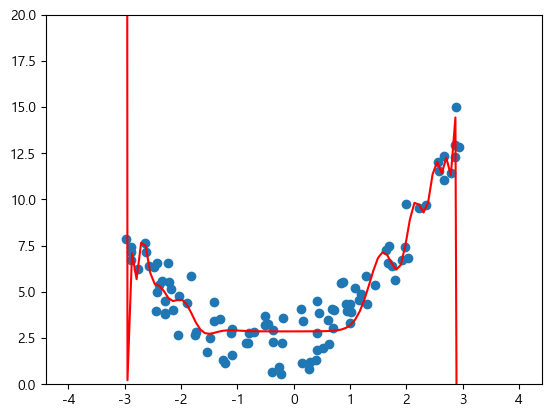

In [32]:
X_new = np.linspace(-4, 4, 100).reshape(-1, 1)
X_new_poly = pn2.transform(X_new) # 변환처리
y_new = lr3.predict(X_new_poly)

plt.scatter(X, y)
plt.plot(X_new, y_new, color='red')
plt.ylim(0, 20)
plt.show()

### PolynomialFeatures 예제

### PolynomialFeatures를 Boston Dataset에 적용

In [33]:
import numpy as np

data = np.arange(12).reshape(4, 3)
print(data.shape)
data

(4, 3)


array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [34]:
from sklearn.preprocessing import PolynomialFeatures
pn = PolynomialFeatures(degree=2)
data_poly2 = pn.fit_transform(data)
data_poly2.shape

(4, 10)

In [35]:
pn.get_feature_names_out()

array(['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [36]:
pn2 = PolynomialFeatures(degree=3)
data_poly3 = pn2.fit_transform(data)
data_poly3.shape

(4, 20)

In [37]:
pn2.get_feature_names_out() # 1. 상수(x0), 2. 제곱(x1^3), 3. 상수 X 제곱(x0^2 x1)

array(['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3'], dtype=object)

### PolynominalFeatures를 Boston Dataset에 적용

In [38]:
pn_boston = PolynomialFeatures(degree=2, include_bias=False)
X_train_scaled_poly = pn_boston.fit_transform(X_train_scaled)
X_test_scaled_poly = pn_boston.transform(X_test_scaled)

In [39]:
print(X_train_scaled.shape)
print(X_train_scaled_poly.shape)

(404, 13)
(404, 104)


In [40]:
pn_boston.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5',
       'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12',
       'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7',
       'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3',
       'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10',
       'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7',
       'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5',
       'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12',
       'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11',
       'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11',
       'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12',
       'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10',
       'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^

##### 모델 생성 학습 추론 평가

In [41]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled_poly, y_train)

LinearRegression()

In [42]:
from metrics import print_metrics_regression as pmr

train_pred = lr.predict(X_train_scaled_poly)
test_pred= lr.predict(X_test_scaled_poly)

pmr(y_train, train_pred, 'train set')
print("="*100)
pmr(y_test, test_pred, 'test set')

train set
MSE: 4.340, RMSE: 2.083, MAE: 1.617, R2: 0.949
test set
MSE: 31.278, RMSE: 5.593, MAE: 3.328, R2: 0.616


In [43]:
X_train_scaled_poly.shape

(404, 104)

## 규제 (Regularization)
- 선형 회귀 모델에서 과대적합(Overfitting) 문제를 해결하기 위해 가중치(회귀계수)에 페널티 값을 적용한다.
- 입력데이터의 Feature들이 너무 많은 경우 Overfitting이 발생.
    - Feature수에 비해 관측치 수가 적은 경우 모델이 복잡해 지면서 Overfitting이 발생한다.
- 해결
    - 데이터를 더 수집한다. 
    - Feature selection
        - 불필요한 Features들을 제거한다.
    - 규제 (Regularization) 을 통해 Feature들에 곱해지는 가중치가 커지지 않도록 제한한다.(0에 가까운 값으로 만들어 준다.)
        - LinearRegression의 규제는 학습시 계산하는 오차를 키워서 모델이 오차를 줄이기 위해 가중치를 0에 가까운 값으로 만들도록 하는 방식을 사용한다.
        - L1 규제 (Lasso)
        - L2 규제 (Ridge)
    

## Ridge Regression (L2 규제)
- 손실함수(loss function)에 규제항으로 $\alpha \sum_{i=1}^{n}{w_{i}^{2}}$ (L2 Norm)을 더해준다.
- $\alpha$는 하이퍼파라미터로 모델을 얼마나 많이 규제할지 조절한다. 
    - $\alpha = 0$ 에 가까울수록 규제가 약해진다. (0일 경우 선형 회귀동일)
    - $\alpha$ 가 커질 수록 모든 가중치가 작아져 입력데이터의 Feature들 중 중요하지 않은 Feature의 예측에 대한 영향력이 작아지게 된다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \cfrac{1}{2}\sum_{i=1}^{n}{w_{i}^{2}}
$$

> **손실함수(Loss Function):** 모델의 예측한 값과 실제값 사이의 차이를 정의하는 함수로 모델이 학습할 때 사용된다.
- feature 가 너무 많아 feature를 줄여주는 역할을 한다.
    - 어느정도 줄여줄 지는 $\alpha$ 를 통해 해결 할 수 있다.

In [44]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [45]:
# alpha => 규제항의 값을 조정하는 하이퍼파라미터 기본값: 1 -> 클수록 규제가 강해진다.
#    overfitting 발생: aplpha를 줄인다.(단순화) underfitting 발생: alpha를 늘린다.(복잡화)
ridge = Ridge(random_state=0)
ridge.fit(X_train_scaled, y_train)
train_pred = ridge.predict(X_train_scaled)
test_pred = ridge.predict(X_test_scaled)
print("alpha: 1")
pmr(y_train, train_pred)
pmr(y_test, test_pred)

alpha: 1
MSE: 19.328, RMSE: 4.396, MAE: 3.100, R2: 0.773
MSE: 33.554, RMSE: 5.793, MAE: 3.843, R2: 0.588


In [46]:
ridge = Ridge(random_state=0, alpha=10)
ridge.fit(X_train_scaled, y_train)
train_pred = ridge.predict(X_train_scaled)
test_pred = ridge.predict(X_test_scaled)
print("alpha: 10")
pmr(y_train, train_pred)
pmr(y_test, test_pred)

alpha: 10
MSE: 19.430, RMSE: 4.408, MAE: 3.085, R2: 0.772
MSE: 34.416, RMSE: 5.866, MAE: 3.845, R2: 0.577


In [47]:
ridge = Ridge(random_state=0, alpha=1000)
ridge.fit(X_train_scaled, y_train)
train_pred = ridge.predict(X_train_scaled)
test_pred = ridge.predict(X_test_scaled)
print("alpha: 1000")
pmr(y_train, train_pred)
pmr(y_test, test_pred)

alpha: 1000
MSE: 36.958, RMSE: 6.079, MAE: 4.230, R2: 0.566
MSE: 52.509, RMSE: 7.246, MAE: 4.820, R2: 0.355


## 규제 alpha 에 따른 weight 변화

In [48]:
ridge.coef_

array([-0.45864225,  0.41346785, -0.50088403, -0.37146951,  1.3043838 ,
       -0.3171222 , -0.08543466, -0.28903107, -0.482927  , -0.92196587,
        0.43630968, -1.20044672,  0.12792467])

In [49]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000]
coef_df = pd.DataFrame() # alpha별 각 feature에 곱할 weight들을 저장할 DataFrame.
for alpha in alpha_list: # enumerate를 통한 index가 1부터 나오도록 함
    
    ridge = Ridge(alpha=alpha, random_state=0)
    ridge.fit(X_train_scaled, y_train)
    
    coef_s = ridge.coef_
    coef_df[f'alpha:{alpha}'] = coef_s

In [50]:
coef_df

,alpha:0.001,alpha:0.01,alpha:0.1,alpha:1,alpha:10,alpha:100,alpha:500,alpha:1000
0,-0.970813,-0.970750,-0.970117,-0.963941,-0.913628,-0.730491,-0.553225,-0.458642
1,1.057132,1.056982,1.055486,1.040912,0.925262,0.594454,0.470234,0.413468
2,0.038287,0.038073,0.035935,0.015328,-0.134694,-0.455731,-0.540009,-0.500884
3,-1.855113,-1.854797,-1.851650,-1.820796,-1.563287,-0.695337,-0.398986,-0.371470
4,2.573232,2.573346,2.574479,2.585455,2.667242,2.679309,1.832447,1.304384
5,-0.087622,-0.087683,-0.088290,-0.094179,-0.139421,-0.246254,-0.307986,-0.317122
6,-2.880911,-2.880627,-2.877791,-2.849766,-2.599335,-1.420874,-0.373000,-0.085435
7,2.112174,2.111532,2.105134,2.043179,1.574239,0.355633,-0.205155,-0.289031
8,-1.875267,-1.874687,-1.868906,-1.813213,-1.411243,-0.646447,-0.528550,-0.482927
9,-2.292760,-2.292695,-2.292048,-2.285645,-2.227769,-1.884899,-1.257527,-0.921966


## Lasso(Least Absolute Shrinkage and Selection Operator) Regression (L1 규제)

- 손실함수에 규제항으로 $\alpha \sum_{i=1}^{n}{\left| w_i \right|}$ (L1 Norm)더한다.
- Lasso 회귀의 상대적으로 덜 중요한 특성의 가중치를 0으로 만들어 자동으로 Feature Selection이 된다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \sum_{i=1}^{n}{\left| w_i \right|}
$$

In [51]:
alpha_list = [0.001, 0.01, 0.1, 1, 5, 10]
coef_df2 = pd.DataFrame()
for alpha in alpha_list:
    
    lasso = Lasso(alpha=alpha, random_state=0)
    lasso.fit(X_train_scaled, y_train)
    
    coef_df2[f'alpha: {alpha}'] = lasso.coef_

In [52]:
coef_df2

,alpha: 0.001,alpha: 0.01,alpha: 0.1,alpha: 1,alpha: 5,alpha: 10
0,-0.968120,-0.943088,-0.688115,-0.000000,-0.000000,-0.0
1,1.053243,1.021554,0.700532,0.000000,0.000000,0.0
2,0.029105,-0.000000,-0.077649,-0.000000,-0.000000,-0.0
3,-1.848308,-1.803915,-1.363690,-0.000000,-0.000000,-0.0
4,2.574250,2.587199,2.748663,2.540098,0.458712,0.0
5,-0.085672,-0.067933,-0.000000,-0.000000,-0.000000,-0.0
6,-2.875215,-2.812970,-2.166935,-0.000000,0.000000,0.0
7,2.094988,1.965025,0.741474,-0.000000,-0.000000,-0.0
8,-1.858605,-1.745788,-0.763099,-0.171527,-0.000000,-0.0
9,-2.291054,-2.281845,-2.206804,-1.784796,-0.000000,-0.0


### PolynormialFeatures로 전처리한 Boston Dataset 에 Ridge, Lasso 규제 적용

In [53]:
X_train_scaled_poly.shape

(404, 104)

##### LinearRegression으로 평가

In [54]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
lr = LinearRegression()
lr.fit(X_train_scaled_poly, y_train)
pmr(y_train, lr.predict(X_train_scaled_poly), "LinearRegression: Train Set")
pmr(y_test, lr.predict(X_test_scaled_poly), "LinearRegression: Test Set")

LinearRegression: Train Set
MSE: 4.340, RMSE: 2.083, MAE: 1.617, R2: 0.949
LinearRegression: Test Set
MSE: 31.278, RMSE: 5.593, MAE: 3.328, R2: 0.616


##### Ridge 의 alpha값 변화에 따른 R square 확인

In [56]:
from sklearn.metrics import r2_score
alpha_list = [0.001, 0.01, 1, 10, 100, 500, 1000]
train_r2_list = []
test_r2_list = []
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha, random_state=0)
    ridge.fit(X_train_scaled_poly, y_train)
    train_pred = ridge.predict(X_train_scaled_poly)
    test_pred = ridge.predict(X_test_scaled_poly)
    print(f"alpha: {alpha}--------------------------")
    pmr(y_train, train_pred)
    pmr(y_test, test_pred)
    train_r2_list.append(r2_score(y_train, train_pred))
    test_r2_list.append(r2_score(y_test, test_pred))

alpha: 0.001--------------------------
MSE: 4.346, RMSE: 2.085, MAE: 1.618, R2: 0.949
MSE: 30.982, RMSE: 5.566, MAE: 3.316, R2: 0.620
alpha: 0.01--------------------------
MSE: 4.365, RMSE: 2.089, MAE: 1.622, R2: 0.949
MSE: 30.209, RMSE: 5.496, MAE: 3.292, R2: 0.629
alpha: 1--------------------------
MSE: 4.785, RMSE: 2.187, MAE: 1.674, R2: 0.944
MSE: 19.273, RMSE: 4.390, MAE: 3.004, R2: 0.763
alpha: 10--------------------------
MSE: 5.738, RMSE: 2.395, MAE: 1.775, R2: 0.933
MSE: 19.074, RMSE: 4.367, MAE: 2.880, R2: 0.766
alpha: 100--------------------------
MSE: 8.970, RMSE: 2.995, MAE: 2.070, R2: 0.895
MSE: 23.437, RMSE: 4.841, MAE: 2.929, R2: 0.712
alpha: 500--------------------------
MSE: 16.921, RMSE: 4.113, MAE: 2.765, R2: 0.801
MSE: 32.884, RMSE: 5.734, MAE: 3.641, R2: 0.596
alpha: 1000--------------------------
MSE: 22.867, RMSE: 4.782, MAE: 3.293, R2: 0.731
MSE: 38.877, RMSE: 6.235, MAE: 4.106, R2: 0.523


In [61]:
result = pd.DataFrame({"train":train_r2_list, "test":test_r2_list}, index=alpha_list)
result

,train,test
0.001,0.948953,0.619516
0.010,0.948736,0.629007
1.000,0.943805,0.763316
10.000,0.932608,0.765755
100.000,0.894646,0.712174
500.000,0.801270,0.596159
1000.000,0.731429,0.522564


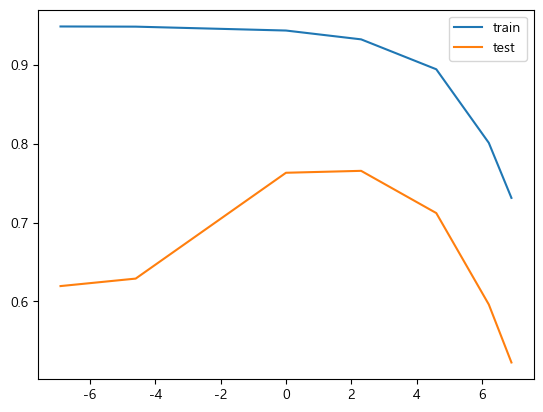

In [62]:
plt.plot(np.log(result.index), result.train, label="train")
plt.plot(np.log(result.index), result.test, label="test")
plt.legend()
plt.show()

- 모델 복잡도 기준으로 train이 좋아지면 좋아질 수록 복잡도가 좋은 것이다.
- 반면에 test의 경우에는 너무 복잡해지면 overfitting이 발생하기 때문에 중간에 감소하게 된다.
- 위 그래프의 왼쪽으로 갈 수록, 즉 alpha값이 낮을 수록 모델이 복잡한 것이다.
- alpha값이 클 수록 규제를 많이 하기 때문에 모델이 단순해진다.

##### lasso 의 alpha값 변화에 따른 R square 확인

In [76]:
alpha_list = [0.001, 0.01, 0.1, 1, 5, 10]

train_r2_list_lasso = []
test_r2_list_lasso = []

for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, random_state=0, max_iter=20000)
    lasso.fit(X_train_scaled_poly, y_train)
    
    train_pred2 = lasso.predict(X_train_scaled_poly)
    test_pred2 = lasso.predict(X_test_scaled_poly)
    
    print(f"-------------alpha: {alpha}-----------------")
    pmr(y_train, train_pred2)
    pmr(y_test, test_pred2)
    
    train_r2_list_lasso.append(r2_score(y_train, train_pred2))
    test_r2_list_lasso.append(r2_score(y_test, test_pred2))

-------------alpha: 0.001-----------------
MSE: 4.416, RMSE: 2.101, MAE: 1.632, R2: 0.948
MSE: 28.180, RMSE: 5.309, MAE: 3.223, R2: 0.654
-------------alpha: 0.01-----------------
MSE: 5.148, RMSE: 2.269, MAE: 1.721, R2: 0.940
MSE: 19.052, RMSE: 4.365, MAE: 2.961, R2: 0.766
-------------alpha: 0.1-----------------
MSE: 8.302, RMSE: 2.881, MAE: 2.078, R2: 0.902
MSE: 22.393, RMSE: 4.732, MAE: 2.827, R2: 0.725
-------------alpha: 1-----------------
MSE: 17.228, RMSE: 4.151, MAE: 2.876, R2: 0.798
MSE: 28.936, RMSE: 5.379, MAE: 3.394, R2: 0.645
-------------alpha: 5-----------------
MSE: 54.732, RMSE: 7.398, MAE: 5.382, R2: 0.357
MSE: 55.210, RMSE: 7.430, MAE: 5.009, R2: 0.322
-------------alpha: 10-----------------
MSE: 84.427, RMSE: 9.188, MAE: 6.742, R2: 0.008
MSE: 80.566, RMSE: 8.976, MAE: 6.212, R2: 0.011


In [77]:
result = pd.DataFrame({"train": train_r2_list_lasso, "test":test_r2_list_lasso}, index=alpha_list)
result

,train,test
0.001,0.948140,0.653926
0.010,0.939534,0.766032
0.100,0.902491,0.724998
1.000,0.797664,0.644639
5.000,0.357183,0.321981
10.000,0.008417,0.010590


- 이런식으로 10의 배수 형태(log scale)로 제작한 다음 가장 좋은 값의 주변에서 다시 나누는 형식을 사용한다.

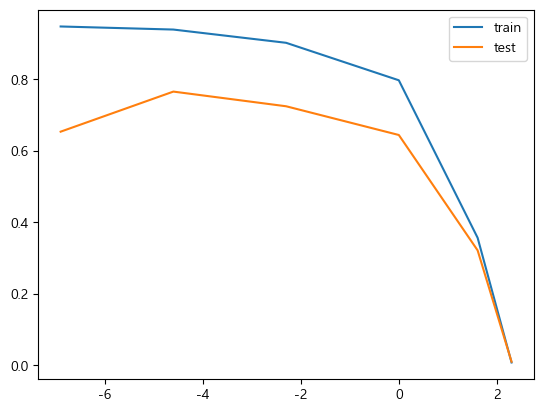

In [78]:
plt.plot(np.log(result.index), result.train, label="train")
plt.plot(np.log(result.index), result.test, label="test")
plt.legend()
plt.show()

## ElasticNet(엘라스틱넷)
- 릿지와 라쏘를 절충한 모델.
- 규제항에 릿지, 라쏘 규제항을 더해서 추가한다. 
- 혼합비율 $r$을 사용해 혼합정도를 조절
- $r=0$이면 릿지와 같고 $r=1$이면 라쏘와 같다.

$$
\text{손실함수}(w) = \text{MSE}(w) + r\alpha \sum_{i=1}^{n}{\left| w_i \right|}  + \cfrac{1-r}{2}\alpha\sum_{i=1}^{n}{w_{i}^{2}}
$$

In [79]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

r_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
alpha_list = [0.1, 1, 10, 50, 100, 500]

e_net = ElasticNet(random_state=0)
params = {
    "l1_ratio" : r_list,
    "alpha" : alpha_list
}
gs = GridSearchCV(e_net,
                 params,
                 scoring='r2', # default가 r2라 생략 가능
                 cv=4,
                 n_jobs=-1
                 )
gs.fit(X_train_scaled_poly, y_train)

GridSearchCV(cv=4, estimator=ElasticNet(random_state=0), n_jobs=-1,
             param_grid={'alpha': [0.1, 1, 10, 50, 100, 500],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             scoring='r2')

In [80]:
gs.best_params_

{'alpha': 0.1, 'l1_ratio': 0.2}

In [81]:
gs.best_score_

0.8565972907373954

In [85]:
result_df = pd.DataFrame(gs.cv_results_)
result_df.sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
1,0.019257,0.004317,0.001748,0.000432,0.1,0.2,"{'alpha': 0.1, 'l1_ratio': 0.2}",0.899531,0.787799,0.830967,0.908093,0.856597,0.049712,1
0,0.026384,0.005528,0.002256,0.000821,0.1,0.1,"{'alpha': 0.1, 'l1_ratio': 0.1}",0.899079,0.790348,0.825952,0.909039,0.856105,0.049704,2
2,0.018254,0.001295,0.002248,0.000433,0.1,0.3,"{'alpha': 0.1, 'l1_ratio': 0.3}",0.899428,0.785110,0.831945,0.906495,0.855744,0.050099,3
3,0.013128,0.001814,0.001501,0.000501,0.1,0.4,"{'alpha': 0.1, 'l1_ratio': 0.4}",0.899368,0.782194,0.830459,0.904659,0.854170,0.050830,4
4,0.014506,0.001661,0.002252,0.001087,0.1,0.5,"{'alpha': 0.1, 'l1_ratio': 0.5}",0.898742,0.778316,0.829445,0.902813,0.852329,0.051731,5


In [86]:
r2_score(y_test, gs.predict(X_test_scaled_poly))

0.7425220273454194

# 정리
- 일반적으로 선형회귀의 경우 어느정도 규제가 있는 경우가 성능이 좋다.
- 기본적으로 **Ridge**를 사용한다.
- Target에 영향을 주는 Feature가 몇 개뿐일 경우 특성의 가중치를 0으로 만들어 주는 **Lasso** 사용한다. 
- 특성 수가 학습 샘플 수 보다 많거나 feature간에 연관성이 높을 때는 **ElasticNet**을 사용한다.